In [1]:
import kagglehub
import os 
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("heesoo37/120-years-of-olympic-history-athletes-and-results")

csv_path = f"{path}/athlete_events.csv"

df = pd.read_csv(csv_path , sep=',' ,encoding="ISO-8859-1")

df.head()

C:\Users\Yash0607\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<!-- ## Data Cleaning -->

In [2]:
df.shape

(271116, 15)

In [3]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
missing_val_percentage = (df.isnull().sum()/len(df) )*100
missing_val_percentage.sort_values(ascending=False)

Medal     85.326207
Weight    23.191180
Height    22.193821
Age        3.494445
Sex        0.000000
ID         0.000000
Name       0.000000
Team       0.000000
NOC        0.000000
Year       0.000000
Games      0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64

In [6]:
df_copy = df.copy()

In [7]:
df_copy = df.copy()
df_copy['Medal'] = df_copy['Medal'].fillna('No Medal')
cols = ['Age' , 'Weight' , 'Height']
for col in cols:
    df_copy[col] = df_copy[col].fillna(df.groupby('Sport')[col].transform('median'))
    df_copy[col] = df_copy[col].fillna(df.groupby('Sex')[col].transform('median'))
    
print(df_copy[df_copy['Weight'].isnull()]['Sport'].unique())

[]


In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
df_copy.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [10]:
# one hot encode medal colums
encoded = pd.get_dummies(df_copy['Medal'], dtype=int)
df_copy = pd.concat([df_copy , encoded] , axis=1)
df_copy.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,1,0


In [11]:
df_copy.sample(10)
df_copy.drop(columns=['ID'] , inplace=True)

In [12]:
# remove whitespaces
for col in df_copy.columns:
    df_copy.replace(" " , "")
df_copy.sample(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
96836,Percy Hodge,M,29.0,176.0,67.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,"Athletics Men's 3,000 metres Steeplechase",Gold,0,1,0,0
167577,Viktor Nagy,M,28.0,198.0,96.0,Hungary,HUN,2012 Summer,2012,Summer,London,Water Polo,Water Polo Men's Water Polo,No Medal,0,0,1,0
170076,Marco Neumann,M,20.0,198.0,94.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Men's Coxless Fours,No Medal,0,0,1,0
166965,Viktor Illich Mykhalchuk,M,22.0,185.0,79.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Volleyball,Volleyball Men's Volleyball,Gold,0,1,0,0
43405,"Gilbert Bayard ""Gil"" Colgate, Jr.",M,36.0,182.0,90.0,United States-2,USA,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Bobsleigh,Bobsleigh Men's Two,Bronze,1,0,0,0
214469,Karl Schultz,M,38.0,180.0,75.0,West Germany,FRG,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Silver,0,0,0,1
98918,Ivan Horvat,M,22.0,183.0,73.0,Croatia,CRO,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,No Medal,0,0,1,0
45514,Eanger Irving Couse,M,61.0,175.0,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",No Medal,0,0,1,0
126288,Luk Krajek,M,30.0,188.0,94.0,Czech Republic,CZE,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,No Medal,0,0,1,0
206453,Ernestine Jean Russell-Carter (-Weaver),F,21.0,153.0,52.0,Canada,CAN,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Women's Horse Vault,No Medal,0,0,1,0


In [13]:
duplicate_val_cols = ['Team' , 'Event' , 'Medal' , 'Year' , 'City' ,'Sport' , 'Games'] 
df_copy.drop_duplicates(subset=duplicate_val_cols , inplace=True)
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0,0,1,0


In [14]:
# we will only analyze by summer olympics
df_copy = df_copy[df_copy['Season']=='Summer']
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [15]:
df_copy.isnull().sum()

Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
Bronze      0
Gold        0
No Medal    0
Silver      0
dtype: int64

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105600 entries, 0 to 271099
Data columns (total 18 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Name      105600 non-null  object 
 1   Sex       105600 non-null  object 
 2   Age       105600 non-null  float64
 3   Height    105600 non-null  float64
 4   Weight    105600 non-null  float64
 5   Team      105600 non-null  object 
 6   NOC       105600 non-null  object 
 7   Games     105600 non-null  object 
 8   Year      105600 non-null  int64  
 9   Season    105600 non-null  object 
 10  City      105600 non-null  object 
 11  Sport     105600 non-null  object 
 12  Event     105600 non-null  object 
 13  Medal     105600 non-null  object 
 14  Bronze    105600 non-null  int64  
 15  Gold      105600 non-null  int64  
 16  No Medal  105600 non-null  int64  
 17  Silver    105600 non-null  int64  
dtypes: float64(3), int64(5), object(10)
memory usage: 15.3+ MB


<!-- ## EDA -->

<!-- ## Total Medals By each Country -->

In [17]:
# get medals by each country
medal_tally = df_copy.groupby(['NOC' , 'Team']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Gold' , ascending=False).reset_index()
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

,NOC,Team,Gold,Silver,Bronze,Total
0,USA,United States,997,780,682,2459
1,URS,Soviet Union,393,317,294,1004
2,GBR,Great Britain,243,286,276,805
3,GER,Germany,224,256,273,753
4,FRA,France,221,232,260,713
...,...,...,...,...,...,...
1168,USA,United States-14,0,0,0,0
1169,CAN,Beaver,0,0,0,0
1170,USA,United States-3,0,0,1,1
1171,USA,United States-4,0,0,1,1


<!-- ## Year wise Comparision of Medals by each Country -->

In [18]:
year_wise_df = df_copy.groupby(['Team', 'Year']).sum()[['Gold', 'Silver', 'Bronze']].sort_values(by=['Year' , 'Gold'],ascending=False).reset_index()
year_wise_df['Total'] = year_wise_df['Gold'] + year_wise_df['Silver'] + year_wise_df['Bronze']
year_wise_df

,Team,Year,Gold,Silver,Bronze,Total
0,United States,2016,45,36,36,117
1,Great Britain,2016,27,23,17,67
2,China,2016,25,18,25,68
3,Russia,2016,18,17,20,55
4,Germany,2016,16,10,15,41
...,...,...,...,...,...,...
4109,Greece-1,1896,0,1,0,1
4110,Greece-2,1896,0,0,0,0
4111,Greece-3,1896,0,0,0,0
4112,Italy,1896,0,0,0,0


<!-- ### 
Todo:
1) Do Overall analysis of Country 
2) fetch medals on a Particular Year and Country -->


In [19]:
country = df_copy['NOC'].unique().tolist()
country.insert(0 , "Overall")
country

['Overall',
 'CHN',
 'DEN',
 'NED',
 'FIN',
 'NOR',
 'ROU',
 'EST',
 'FRA',
 'MAR',
 'ESP',
 'EGY',
 'IRI',
 'BUL',
 'ITA',
 'CHA',
 'AZE',
 'SUD',
 'RUS',
 'ARG',
 'CUB',
 'BLR',
 'GRE',
 'CMR',
 'TUR',
 'CHI',
 'MEX',
 'USA',
 'URS',
 'NCA',
 'HUN',
 'NGR',
 'ALG',
 'KUW',
 'BRN',
 'PAK',
 'IRQ',
 'UAR',
 'LIB',
 'QAT',
 'MAS',
 'GER',
 'CAN',
 'IRL',
 'AUS',
 'RSA',
 'ERI',
 'TAN',
 'JOR',
 'TUN',
 'LBA',
 'BEL',
 'DJI',
 'PLE',
 'COM',
 'KAZ',
 'BRU',
 'IND',
 'KSA',
 'SYR',
 'MDV',
 'ETH',
 'UAE',
 'YAR',
 'INA',
 'PHI',
 'SGP',
 'UZB',
 'KGZ',
 'TJK',
 'EUN',
 'JPN',
 'CGO',
 'SUI',
 'BRA',
 'GDR',
 'MON',
 'ISR',
 'URU',
 'SWE',
 'SRI',
 'ARM',
 'CIV',
 'KEN',
 'BEN',
 'GBR',
 'GHA',
 'SOM',
 'NIG',
 'MLI',
 'AFG',
 'POL',
 'CRC',
 'PAN',
 'GEO',
 'SLO',
 'GUY',
 'NZL',
 'POR',
 'PAR',
 'ANG',
 'VEN',
 'COL',
 'FRG',
 'BAN',
 'PER',
 'ESA',
 'PUR',
 'UGA',
 'HON',
 'ECU',
 'TKM',
 'MRI',
 'SEY',
 'TCH',
 'LUX',
 'MTN',
 'SKN',
 'TTO',
 'DOM',
 'VIN',
 'JAM',
 'LBR',
 'SUR',
 'NE

In [20]:
years = df_copy['Year'].unique().tolist()
years.sort()
years.insert(0 , "Overall")
# years

In [21]:
# The standard "Overall" Tally
# medal_tally = medal_df.groupby('NOC').sum()['Medal']
medal_tally = df_copy.groupby(['Year']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Year' , ascending=True).reset_index()
medal_tally

,Year,Gold,Silver,Bronze
0,1896,43,41,34
1,1900,95,93,92
2,1904,96,92,89
3,1906,74,75,73
4,1908,109,107,106
5,1912,108,104,104
6,1920,158,152,139
7,1924,129,131,131
8,1928,119,118,119
9,1932,125,125,120


<!-- ## Get Medal Tally Overall of a Country and of a Particular Year -->

In [22]:
medal_df = df_copy[['Team' , 'NOC' , 'Games' ,'Year' , 'City' , 'Sport' , 'Event' , 'No Medal' , 'Gold' , 'Silver' , 'Bronze' , 'Medal']]
# medal_df.isnull().sum()
# medal_df[medal_df['Medal']=='Gold']['NOC'].value_counts()
medal_df

,Team,NOC,Games,Year,City,Sport,Event,No Medal,Gold,Silver,Bronze,Medal
0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,1,0,0,0,No Medal
1,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,1,0,0,0,No Medal
2,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,1,0,0,0,No Medal
3,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0,0,Gold
26,Netherlands,NED,1932 Summer,1932,Los Angeles,Athletics,Athletics Women's 100 metres,1,0,0,0,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Soviet Union,URS,1956 Summer,1956,Melbourne,Athletics,Athletics Women's Shot Put,0,0,1,0,Silver
271080,Soviet Union,URS,1964 Summer,1964,Tokyo,Athletics,Athletics Women's Shot Put,0,0,0,1,Bronze
271087,Poland,POL,1980 Summer,1980,Moskva,Swimming,Swimming Men's 100 metres Butterfly,1,0,0,0,No Medal
271088,Poland,POL,1980 Summer,1980,Moskva,Swimming,Swimming Men's 200 metres Butterfly,1,0,0,0,No Medal


In [23]:
def get_medal_tally(year , country):
    '''
    there can be 4 cases in case of getting medal tally
    1) overall analysis by year of a country
    3) performance by country
    2) performance by year
    4) performance by country and year.
    '''
    flag = 0
    # case1
    if(year == 'Overall' and country =='Overall'):
        temp_df = medal_df
    # case 2
    if(year=='Overall' and country!='Overall'):
       flag = 1
       temp_df =  medal_df[medal_df['NOC']==country] 
    # case 3
    if(year!='Overall' and country =='Overall'):
        temp_df = medal_df[medal_df['Year']==int(year)]
    # case 4
    if( year!='Overall' and country!='Overall'):
       temp_df =  medal_df[(medal_df['NOC']==country) & (medal_df['Year']==year)]
       
    # get medals by each country and Year.
    if(flag==1):
        medal_tally = temp_df.groupby(['Year']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Year' , ascending=True).reset_index()
        
    else:
        
        medal_tally = temp_df.groupby(['NOC']).sum()[['Gold' , 'Silver' , 'Bronze']].sort_values(by='Gold' , ascending=False).reset_index()
        
    medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
    # print(medal_tally)
    return medal_tally

get_medal_tally(year = 'Overall' , country='IND')

,Year,Gold,Silver,Bronze,Total
0,1900,0,2,0,2
1,1920,0,0,0,0
2,1924,0,0,0,0
3,1928,1,0,0,1
4,1932,1,0,0,1
5,1936,1,0,0,1
6,1948,1,0,0,1
7,1952,1,0,1,2
8,1956,1,0,0,1
9,1960,0,1,0,1


<!-- ## Overall Analysis
1) No of Editions
2) No of Cities
3) No of Events/Sports
4) No of Athletes
5) Participating Nations -->

In [24]:
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [25]:
# No of Editions
df_copy['Year'].unique().shape[0]-1 # No of Times It occured till 2016
# No Of Cities
df_copy['City'].unique().shape[0] # 23 cities have hosted Olympics
# No of Sports
df_copy['Sport'].unique().shape[0] # 52 Sports have been played
# No of Events.
df_copy['Event'].unique().shape[0] # 651 different Events 
# Participating Nations
df_copy['NOC'].unique().shape[0]

230

In [26]:
# df_copy.groupby(['Year' , 'NOC']).value_counts()['Year']
nations_over_time = df_copy.drop_duplicates(['Year' , 'NOC'])['Year'].value_counts().reset_index().sort_values(by='count')
nations_over_time.rename(columns={'count':'No of Countries' , 'Year':'Edition'},inplace=True)
nations_over_time 

,Edition,No of Countries
28,1896,12
27,1904,15
26,1906,21
25,1908,22
23,1920,29
24,1900,29
22,1912,29
21,1924,45
20,1928,46
19,1932,47


In [27]:
events_over_time = df_copy.drop_duplicates(['Year' , 'Event'])['Year'].value_counts().reset_index().sort_values(by='count')
events_over_time.rename(columns={'count':'No of Events'} ,inplace=True)
events_over_time 

,Year,No of Events
28,1896,43
27,1906,74
26,1900,90
25,1904,95
24,1912,107
23,1908,109
22,1928,122
20,1924,131
21,1932,131
19,1952,149


In [28]:
def info_over_years(dataframe , col):
    # no. of nations participated in olympics each year.
    info_over_time = dataframe.drop_duplicates(['Year' , col])['Year'].value_counts().reset_index().sort_values(by='count')
    info_over_time.rename(columns={f'count':f'No of {col}' , 'Year':'Edition'},inplace=True)
    return info_over_time
    
info_over_years(df_copy , 'NOC')
    

,Edition,No of NOC
28,1896,12
27,1904,15
26,1906,21
25,1908,22
23,1920,29
24,1900,29
22,1912,29
21,1924,45
20,1928,46
19,1932,47


In [29]:
df_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,No Medal,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,0,0,1,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,0,0,1,0
2,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,0,0,1,0
3,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,67.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No Medal,0,0,1,0


In [30]:
import plotly.express as px
import nbformat

In [31]:
nations_over_time = df_copy.drop_duplicates(['Year' , 'NOC'])['Year'].value_counts().reset_index()
nations_over_time.rename(columns={'count':'No of Countries' , 'Year':'Edition'} ,inplace=True)
nations_over_time.sort_values(by = 'Edition')

fig = px.line(nations_over_time , x = 'Edition' , y = 'No of Countries')
fig.show()

In [32]:
events_over_time = df_copy.drop_duplicates(['Year' , 'Event'])['Year'].value_counts().reset_index()
events_over_time.rename(columns={'count':'No of Events' , 'Year':'Edition'} ,inplace=True)
events_over_time.sort_values(by = 'No of Events')
fig = px.line(events_over_time , x = 'Edition' , y = 'No of Events')
fig.show()


In [33]:
athlete_over_time = df_copy.drop_duplicates(['Year' , 'Name'])['Year'].value_counts().reset_index()
athlete_over_time.rename(columns={'count':'No of Athletes' , 'Year':'Edition'} ,inplace=True)
athlete_over_time.sort_values(by = 'No of Athletes')
fig = px.line(athlete_over_time , x = 'Edition' , y = 'No of Athletes')
fig.show()


<!-- ## Most SuccessFul Players Of a Sport -->

In [34]:
# y = df_copy[df_copy['Medal'].notna()]
# y = y[y['Sport']=='Swimming']
# top_players = y['Name'].value_counts().reset_index()
# top_players.columns = ['Name' , 'Medals']
# x = top_players.merge(df_copy , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
# x.head(10)

In [35]:
# get most successful by sports.
def most_successful_by_sport(df ,sport):
    temp = df[df['Medal'].notna()]
    temp = df[(df['Medal']!='No Medal')]

    if sport!='Overall':
        temp = df[df['Sport']==sport]
    
    top_players = temp['Name'].value_counts().reset_index()
    top_players.columns = ['Name' , 'Medals']
    # left join original and top_players data frame on name.
    x = top_players.merge(df , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
    return x.head(10)

# get most successful players of a country by 
def most_successful_by_country_code(df ,country_code):
    temp = df[df['Medal'].notna()]
    temp = df[(df['Medal']!='No Medal') & (df['NOC']==country_code)]
    top_players = temp['Name'].value_counts().reset_index()
    top_players.columns = ['Name' , 'Medals']
    # left join original and top_players data frame on name.
    x = top_players.merge(df , on='Name' , how='left')[['Name' , 'Sport' , 'Medals' , 'NOC']].drop_duplicates('Name')
    return x.head(10)


# most_successful_by_country_code(df_copy , 'IND')
# most_successful_by_sport(df_copy,'Overall')


<!-- ##  Sport Events Over the Years -->

In [36]:
x = df_copy.drop_duplicates(['Year' , 'Sport' , 'Event'])
x.pivot_table(index = 'Sport' , values='Event'  , columns='Year', aggfunc='count' , fill_value=0)

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


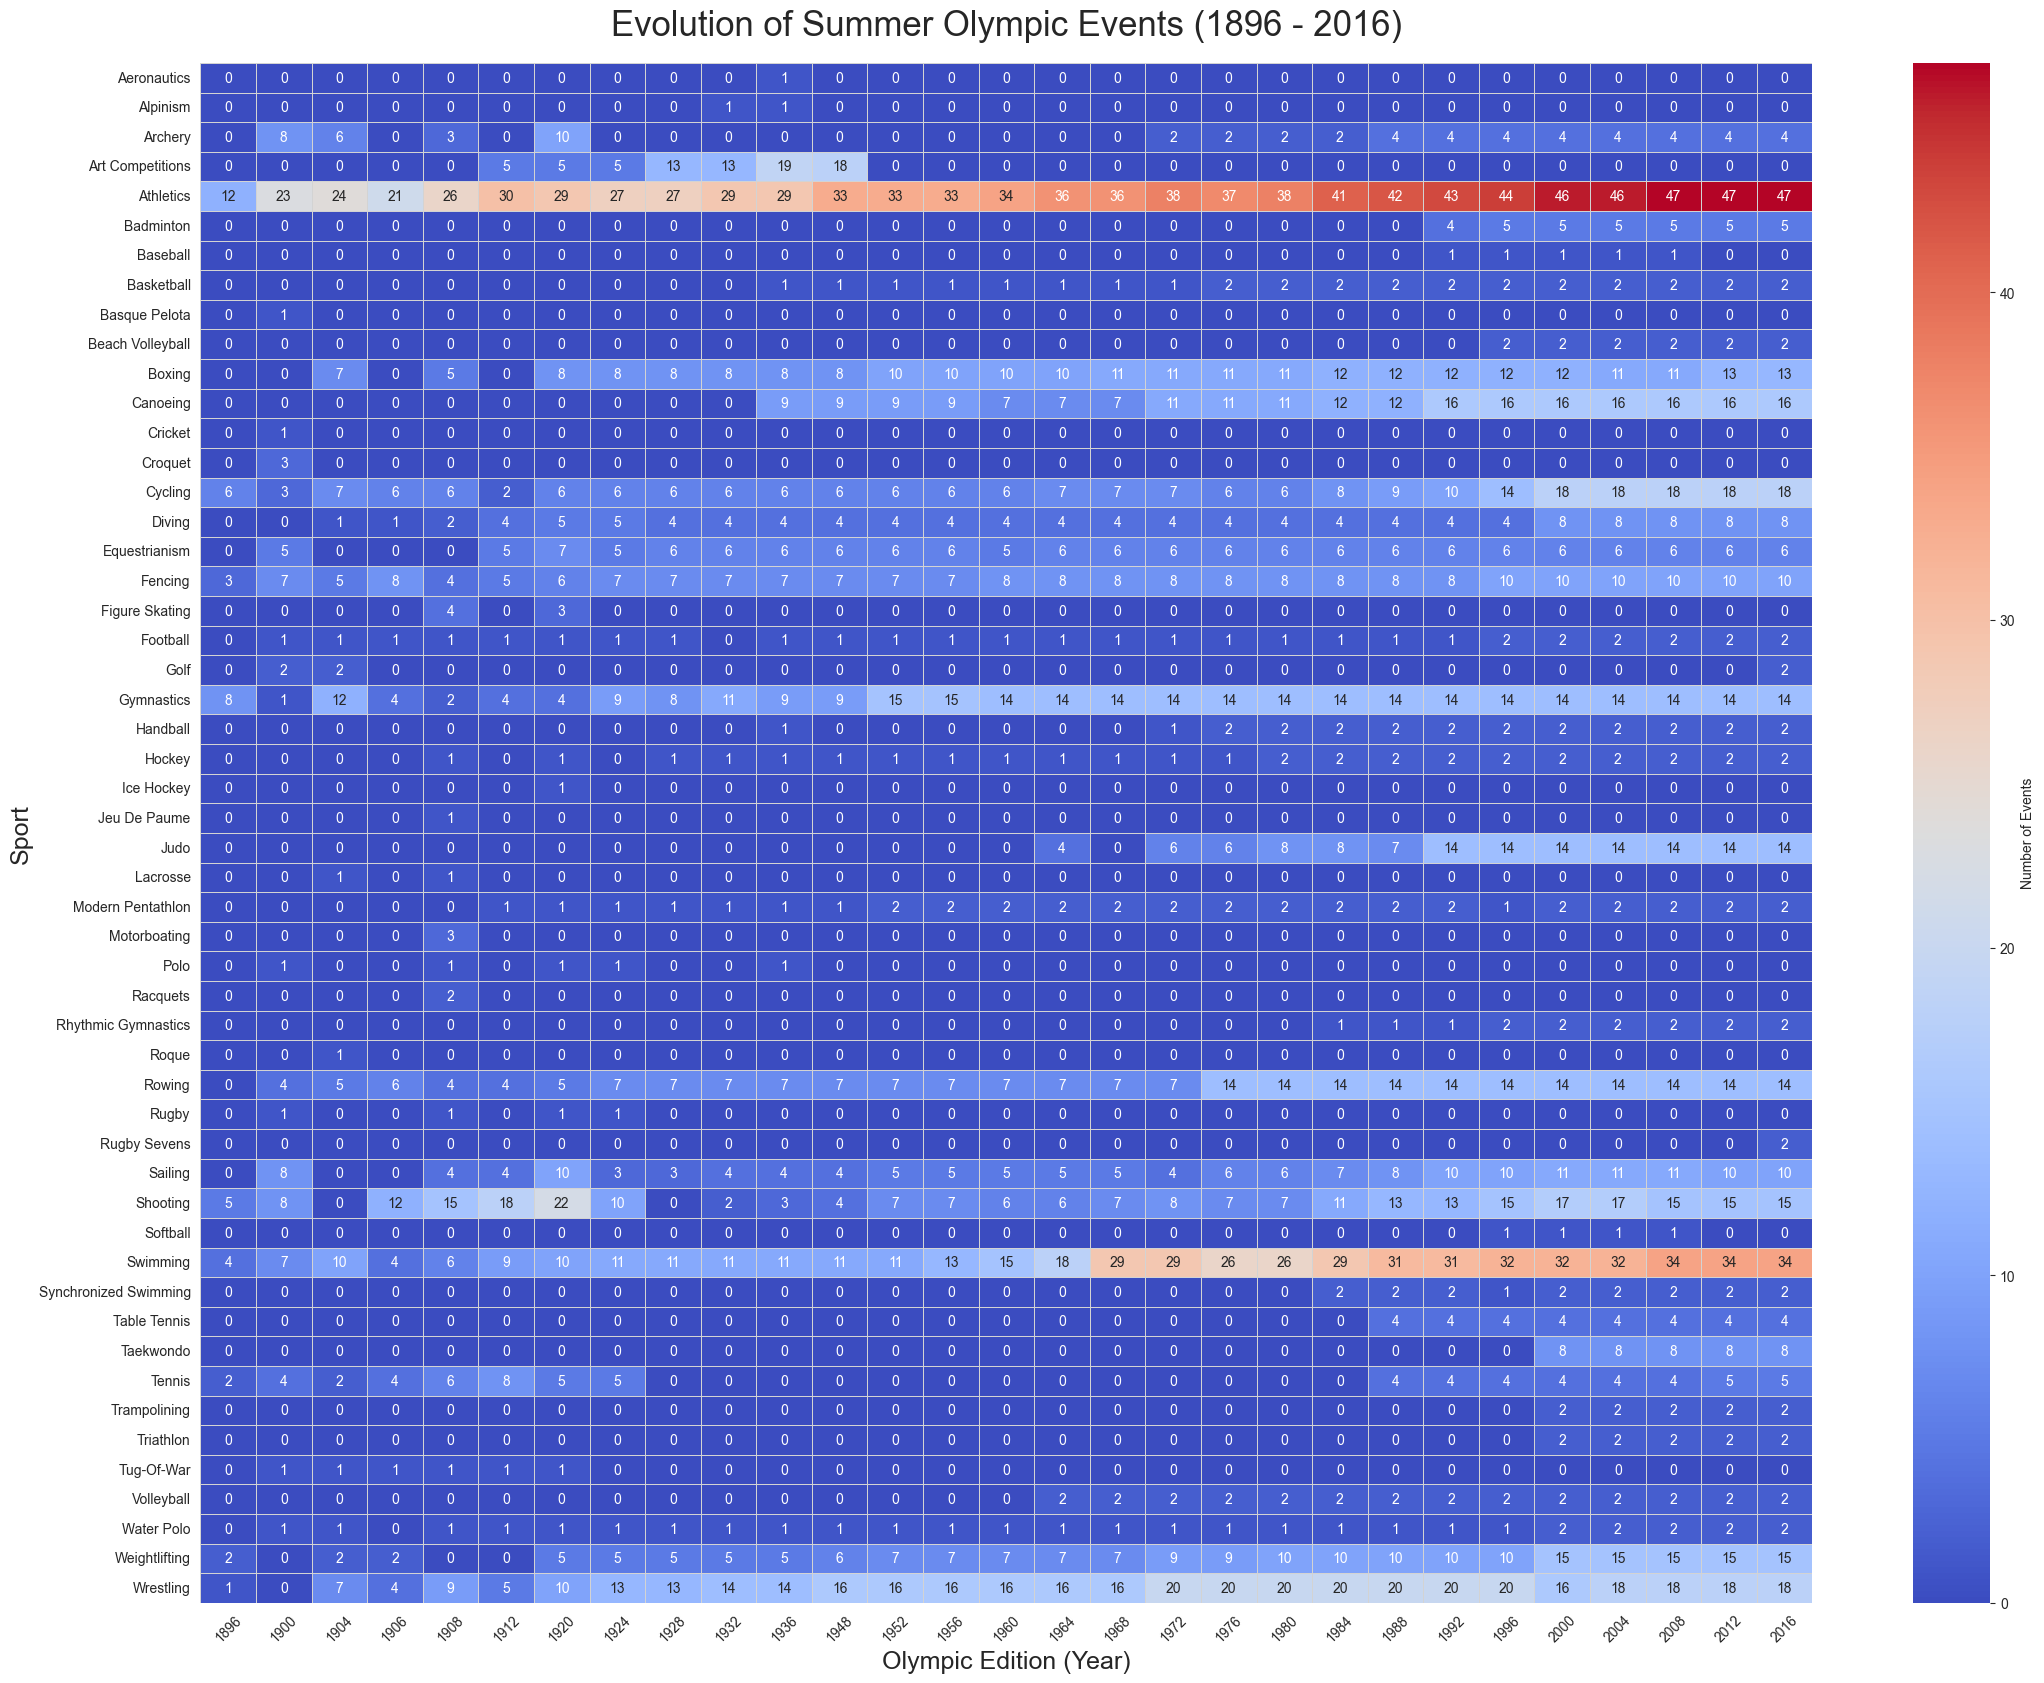

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
x = df_copy.drop_duplicates(['Year' , 'Sport' , 'Event'])
events_over_years = x.pivot_table(index = 'Sport' , values='Event'  , columns='Year', aggfunc='count' , fill_value=0)
sns.set_style("white")
# Decoration & Plotting
plt.figure(figsize=(26, 20))
sns.heatmap(events_over_years, 
            annot=True,          # Show the numbers
            fmt="d",             # Use integers
            cmap="coolwarm",       # Aesthetic yellow-to-blue palette
            linewidths=.5,       # Thin grid lines
            linecolor='lightgrey',
            cbar_kws={'label': 'Number of Events'}) # Label for the color bar

# Professional titles and labels
plt.title('Evolution of Summer Olympic Events (1896 - 2016)', fontsize=25, pad=20)
plt.xlabel('Olympic Edition (Year)', fontsize=18)
plt.ylabel('Sport', fontsize=18)

# Rotate labels for readability
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 

plt.show()

<!-- ## Country-Wise Analysis
1) Countrywise-medal tally per year
2) Which countries are good
3) Most Successful Athletes(Top-10) -->

<!-- ## Countrywise-medal-tally-per year -->

In [38]:
def events_over_years(df , country):
    df = df.drop_duplicates(['Year' , 'Sport' , 'Event'])
    df = df[df['NOC'].notna()]
    x = df[df['NOC']==country]
    event_over_time = x.pivot_table(index = 'Sport' , values='Event'  , columns='Year', aggfunc='count' , fill_value=0).reset_index()
    return event_over_time

events_over_years(df_copy , 'USA')

Year,Sport,1896,1900,1904,1906,1908,1912,1920,1924,1928,...,1976,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Archery,0,0,6,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,Art Competitions,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,Athletics,8,9,22,1,8,4,5,2,6,...,0,3,1,0,2,3,2,2,3,3
3,Badminton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,Baseball,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,Boxing,0,0,7,0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
6,Canoeing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Cycling,0,0,7,0,0,0,0,0,0,...,1,0,1,0,0,2,1,2,0,2
8,Diving,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,1,0,1
9,Equestrianism,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0


In [39]:
df_copy.shape

(105600, 18)

In [40]:
def medal_tally_country_wise(df, country):
    temp = df.dropna(subset=['Medal'])
    temp = df[(df['NOC'] == country) & (df['Medal'] != 'No Medal')]
    
    temp = temp.drop_duplicates(subset=['NOC', 'Year', 'Sport', 'Event', 'Medal'])
    
    # 3. Group and count
    country_wise_medal_tally = temp.groupby('Year').count()['Medal'].reset_index()
    
    return country_wise_medal_tally

# temp = df_copy.dropna(subset=['Medal'])
# temp = df_copy[(df_copy['NOC']=='IND') & (df['Medal']!='No Medal')]
# # temp = temp.drop_duplicates(subset=['NOC', 'Year', 'Sport', 'Event', 'Medal'])
# temp = temp.drop_duplicates(subset=['NOC', 'Year', 'Sport', 'Event', 'Medal'])
# country_wise_medal_tally = temp.groupby('Year').count()['Medal'].reset_index()
india_tally_yearwise = medal_tally_country_wise(df_copy , 'IND')
fig = px.line(india_tally_yearwise,x='Year' , y='Medal')
fig.show()

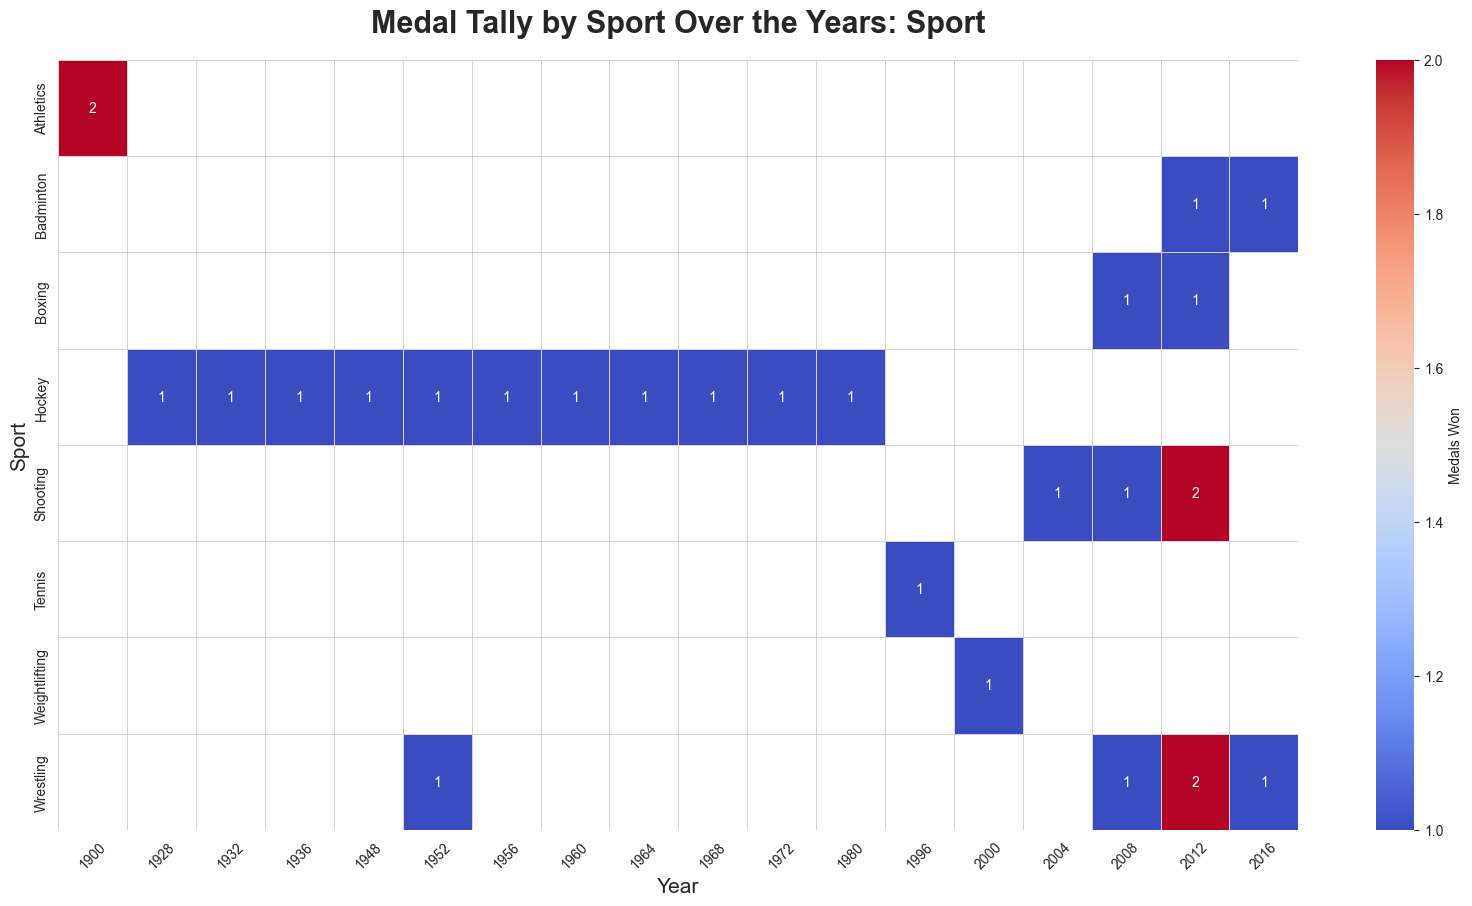

In [41]:
def medal_over_the_years(df, country):
    # Filtering and deduplication (Event-based)
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['Medal'] != 'No Medal']
    temp_df = temp_df[temp_df['NOC'] == country]
    
    # Strict deduplication for official count
    temp_df = temp_df.drop_duplicates(subset=['NOC', 'Year', 'Sport', 'Event', 'Medal'])
    
    # Pivot table (Keep Sport as index)
    x = temp_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count', fill_value=0)
    return x 

# Get data
temp = medal_over_the_years(df_copy, 'IND')

# Plotting with Decorators
plt.figure(figsize=(20, 10))
sns.set_style("white")

# 'mask' hides the 0s so only winning years are colored
# 'YlGnBu' is more modern; 'annot' shows the count
sns.heatmap(temp, 
            annot=True, 
            mask=(temp == 0), 
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor='lightgrey',
            cbar_kws={'label': 'Medals Won'})

plt.title(f"Medal Tally by Sport Over the Years: {temp.index.name if 'temp' in locals() else 'Country'}", 
          fontsize=22, fontweight='bold', pad=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sport", fontsize=15)
plt.xticks(rotation=45)

plt.show()

## Distribution Plots of Athlete's Age Distribution By Medal.

In [42]:
import plotly.figure_factory as ff

In [51]:
athlete_df = df_copy.drop_duplicates(subset=['Name','NOC'])
x1 = athlete_df['Age']
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age']
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age']
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age']


In [52]:
# df_copy.head()
fig = ff.create_distplot([x1,x2,x3,x4],[ 'Overall Age' , 'Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

### Distribution of Sports Wrt Age 

In [149]:
athlete_df = df_copy.drop_duplicates(subset=['Name','NOC'])
gold_won = athlete_df[athlete_df['Medal']=='Gold']
unique_sports = gold_won['Sport'].value_counts().head(30).index.tolist()
sport_names = []
val = []
for sport in unique_sports:
        ages = gold_won[gold_won['Sport']==sport]['Age']
        val.append(ages)
        sport_names.append(sport)

In [147]:
def age_distribution_by_sport(df):
    athlete_df = df.drop_duplicates(subset=['Name','NOC'])
    gold_won = athlete_df[athlete_df['Medal']=='Gold']
    unique_sports = gold_won['Sport'].value_counts().head(20).index.tolist()
    sport_names = []
    val = []
    for sport in unique_sports:
        ages = gold_won[gold_won['Sport']==sport]['Age']
        val.append(ages)
        sport_names.append(sport)
        
# age_distribution_by_sport(df_copy)

In [150]:
fig = ff.create_distplot(val, sport_names, show_hist=False, show_rug=False)
fig.update_layout(title_text='Age Distribution of Gold Medalists (Top 30 Sports)')
fig.show()

## Height v/s Weight Analysis

<Axes: xlabel='Weight', ylabel='Height'>

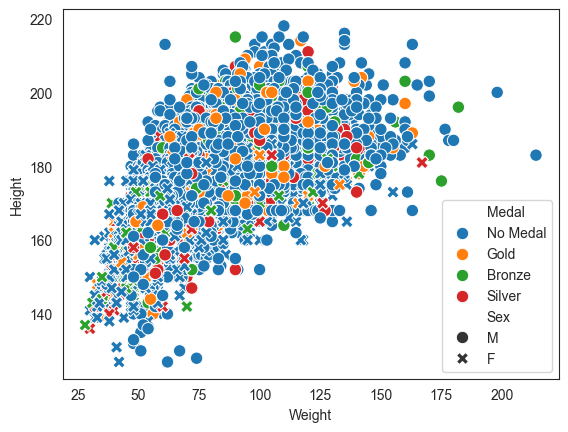

In [ ]:
athlete_df = df_copy.drop_duplicates(subset=['Name','NOC','Medal'])
sns.scatterplot(data=athlete_df, x= athlete_df['Weight'] , y = athlete_df['Height'] , hue=athlete_df['Medal'] ,style=athlete_df['Sex'],s=80)

In [160]:
def weight_vs_height(df,sport):
    athlete_df = df.drop_duplicates(subset=['Name','NOC','Medal'])
    if sport !='Overall':
        temp_df = athlete_df[(athlete_df['Sport']==sport)]
        return temp_df
    else:
        return athlete_df


## Men v/s Women In Olympics over the Years

In [193]:
def men_vs_women(df):
    athlete_df = df.drop_duplicates(subset=['Name','NOC'])
    men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()
    final = men.merge(women ,on='Year' ,how='left')
    final.rename(columns={'Name_x':'Men' , 'Name_y':'Women'},inplace=True)
    final = final.fillna(0)
    final = final.astype(int)
    return final 

final_df = men_vs_women(df_copy)
fig = px.line(final_df,x = 'Year' , y = ['Men' , 'Women'])
fig.show()